In [58]:
import pandas as pd
import numpy as np
import datetime as dt
import webbrowser

import urlparse

import matplotlib.pyplot as plt
pd.set_option('max_columns', 50)
%matplotlib inline

In [59]:
#reading in different file types
#webbrowser.open("https://github.com/gjreda/pydata2014nyc/blob/master/demo.ipynb")

#how to run SQL queries
#webbrowser.open("https://s3itwiki.uzh.ch/display/esc403fs2016/How+to+run+SQL+queries+in+the+Jupyter-IPython+notebook")

#import files
js = pd.read_csv("H:\\Technographics\R Study Group\\Jumpshot Behavioral Data Sample\\2016.01.30_jssample.tsv", sep='\t', nrows=500000)
#raw = pd.read_csv("H:\\Nicole & Riccardo - Behavioral Data\\Data Files (Txt)\\Master Source Data\\RN_Mobile_USUK_AppWebUsage_Apr2015.txt", sep='\t', nrows=100000, encoding='cp1252')

In [60]:
# check for data types
js.info()

js.head()

#remember, Type 'object' is a string for pandas, which poses problems with machine learning algorithms. 
#If we want to use these as features, we'll need to convert these to number representations.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
MDY          500000 non-null int64
HIS          500000 non-null int64
Timestamp    500000 non-null int64
Userid       500000 non-null object
Platform     500000 non-null object
EventType    500000 non-null int64
AgeGroup     500000 non-null object
Gender       500000 non-null object
Country      500000 non-null object
State        500000 non-null object
City         500000 non-null object
Domain       500000 non-null object
Host         500000 non-null object
Path         500000 non-null object
dtypes: int64(4), object(10)
memory usage: 53.4+ MB


,MDY,HIS,Timestamp,Userid,Platform,EventType,AgeGroup,Gender,Country,State,City,Domain,Host,Path
0,20160131,51515,1454213715,000013153a781a1095faaf29c7358e4340f8c87ce9d2d3...,PC,1,35-44,M,US,Ohio,Toledo,amazon.com,www.amazon.com,/Giro-Range-Winter-Helmet-Fabricator/dp/B011T5...
1,20160131,103229,1454232749,000013153a781a1095faaf29c7358e4340f8c87ce9d2d3...,PC,1,35-44,M,US,Ohio,Toledo,amazon.com,www.amazon.com,/Leki-8-575-003-LEKI-Snowflake-Basket/dp/B001P...
2,20160131,103550,1454232950,000013153a781a1095faaf29c7358e4340f8c87ce9d2d3...,PC,1,35-44,M,US,Ohio,Toledo,amazon.com,www.amazon.com,/Black-Diamond-360553-Powder-Basket/dp/B0014FT...
3,20160131,103722,1454233042,000013153a781a1095faaf29c7358e4340f8c87ce9d2d3...,PC,1,35-44,M,US,Ohio,Toledo,amazon.com,www.amazon.com,/Black-Powder-Ski-Pole-Basket/dp/B010TTRMVQ/re...
4,20160131,103822,1454233102,000013153a781a1095faaf29c7358e4340f8c87ce9d2d3...,PC,1,35-44,M,US,Ohio,Toledo,amazon.com,www.amazon.com,/pole-baskets-poles-powder-basket/dp/B0023BRPD...


In [61]:
#create a list of headers and rename columns
js.columns.tolist()

js.rename(columns={'Userid': 'pam_id',
                   'Platform' : 'devicetype',
                   'Country' : 'market',
                   'Domain' : 'name'}, inplace=True)

In [62]:
#create LocalDateTime in JS dataframe
js.MDY = js.MDY.astype(str)
js['Year'] = pd.to_numeric(js['MDY'].str[:4])
js['Month'] = pd.to_numeric(js['MDY'].str[4:6])
js['Day'] = pd.to_numeric(js['MDY'].str[6:8])

js.Timestamp = js.Timestamp.astype(str)
js['Hour'] = pd.to_numeric(js['Timestamp'].str[4:6])
js['Minute'] = pd.to_numeric(js['Timestamp'].str[6:8])
js['Second'] = pd.to_numeric(js['Timestamp'].str[8:10])

js['LocalDateTime'] = pd.to_datetime(js[['Year', 'Month','Day','Hour','Minute','Second']])

js.drop(['Year','Month','Day','Hour','Minute','Second','MDY','Timestamp','HIS'], axis=1, inplace=True)

js.head()

,pam_id,devicetype,EventType,AgeGroup,Gender,market,State,City,name,Host,Path,LocalDateTime
0,000013153a781a1095faaf29c7358e4340f8c87ce9d2d3...,PC,1,35-44,M,US,Ohio,Toledo,amazon.com,www.amazon.com,/Giro-Range-Winter-Helmet-Fabricator/dp/B011T5...,2016-01-31 21:37:15
1,000013153a781a1095faaf29c7358e4340f8c87ce9d2d3...,PC,1,35-44,M,US,Ohio,Toledo,amazon.com,www.amazon.com,/Leki-8-575-003-LEKI-Snowflake-Basket/dp/B001P...,2016-01-31 23:27:49
2,000013153a781a1095faaf29c7358e4340f8c87ce9d2d3...,PC,1,35-44,M,US,Ohio,Toledo,amazon.com,www.amazon.com,/Black-Diamond-360553-Powder-Basket/dp/B0014FT...,2016-01-31 23:29:50
3,000013153a781a1095faaf29c7358e4340f8c87ce9d2d3...,PC,1,35-44,M,US,Ohio,Toledo,amazon.com,www.amazon.com,/Black-Powder-Ski-Pole-Basket/dp/B010TTRMVQ/re...,2016-01-31 23:30:42
4,000013153a781a1095faaf29c7358e4340f8c87ce9d2d3...,PC,1,35-44,M,US,Ohio,Toledo,amazon.com,www.amazon.com,/pole-baskets-poles-powder-basket/dp/B0023BRPD...,2016-01-31 23:31:02


In [63]:
#create df map of unique panelists and their info
#some panelists have different information - same pam_id with different rows. For now let's keep on
panel = js[['pam_id','AgeGroup','Gender','State','City']].drop_duplicates('pam_id', keep='first')
pam_ids = panel.groupby(['pam_id']).size().sort_values(ascending=True)


In [64]:
#regrouping age
age_dict = {
                    "<18":    "0",
                    "18-24":  "1",
                    "25-34":  "2",
                    "35-44":  "3",
                    "45-54":  "4",
                    "55-64" : "5",
                    "65+":    "5"
                    } 
panel['panel_age'] = panel['AgeGroup'].map(age_dict)
panel.head()

#checking to make sure it worked
panel.groupby(['AgeGroup','panel_age']).size()

AgeGroup  panel_age
18-24     1             3670
25-34     2             1964
35-44     3            11073
45-54     4             6749
55-64     5             3457
65+       5             1503
<18       0              670
dtype: int64

In [65]:
#regrouping gender
panel.Gender.drop_duplicates()

panel['panel_gender'] = panel['Gender'].map({'F':2, 'M':1,'U':99}).astype(int)

#checking to make sure it worked
panel.groupby(['Gender','panel_gender']).size()


Gender  panel_gender
F       2               10154
M       1               16738
U       99              20297
dtype: int64

In [66]:
#testing join in panel data
# merge performs an INNER JOIN by default
# for right join, specify right
#for outer join, specify outer
js.drop(['AgeGroup','Gender','State','City'], axis=1, inplace=True)

js_w_panel = pd.merge(js, panel, on='pam_id')
js_w_panel.head()

,pam_id,devicetype,EventType,market,name,Host,Path,LocalDateTime,AgeGroup,Gender,State,City,panel_age,panel_gender
0,000013153a781a1095faaf29c7358e4340f8c87ce9d2d3...,PC,1,US,amazon.com,www.amazon.com,/Giro-Range-Winter-Helmet-Fabricator/dp/B011T5...,2016-01-31 21:37:15,35-44,M,Ohio,Toledo,3,1
1,000013153a781a1095faaf29c7358e4340f8c87ce9d2d3...,PC,1,US,amazon.com,www.amazon.com,/Leki-8-575-003-LEKI-Snowflake-Basket/dp/B001P...,2016-01-31 23:27:49,35-44,M,Ohio,Toledo,3,1
2,000013153a781a1095faaf29c7358e4340f8c87ce9d2d3...,PC,1,US,amazon.com,www.amazon.com,/Black-Diamond-360553-Powder-Basket/dp/B0014FT...,2016-01-31 23:29:50,35-44,M,Ohio,Toledo,3,1
3,000013153a781a1095faaf29c7358e4340f8c87ce9d2d3...,PC,1,US,amazon.com,www.amazon.com,/Black-Powder-Ski-Pole-Basket/dp/B010TTRMVQ/re...,2016-01-31 23:30:42,35-44,M,Ohio,Toledo,3,1
4,000013153a781a1095faaf29c7358e4340f8c87ce9d2d3...,PC,1,US,amazon.com,www.amazon.com,/pole-baskets-poles-powder-basket/dp/B0023BRPD...,2016-01-31 23:31:02,35-44,M,Ohio,Toledo,3,1


In [67]:
#freq - see how many rows there are for each day
js_w_panel.groupby([js_w_panel.LocalDateTime.dt.day]).size()

LocalDateTime
1     129671
30     58015
31    312314
dtype: int64

In [68]:
#Freq of visits by pam_id, name, day, and event type
freq = js_w_panel.groupby(['pam_id','name',js_w_panel.LocalDateTime.dt.day,'EventType']).size().reset_index(name="Freq")
freq.head()

,pam_id,name,LocalDateTime,EventType,Freq
0,000013153a781a1095faaf29c7358e4340f8c87ce9d2d3...,amazon.com,31,1,10
1,000013153a781a1095faaf29c7358e4340f8c87ce9d2d3...,amazon.com,31,2,8
2,000031ad6e63aecb5b2947f2657d168df65414592c3dc8...,amazon.com,31,1,4
3,000031ad6e63aecb5b2947f2657d168df65414592c3dc8...,amazon.com,31,2,2
4,000031ad6e63aecb5b2947f2657d168df65414592c3dc8...,amazon.com,31,3,1


In [69]:
#Avg visits per person by name, day, and event type
avg = (pd.DataFrame({'mean_per_day' : freq.groupby(['name', js_w_panel.LocalDateTime.dt.day, 'EventType']).mean().stack()})).reset_index()
avg = avg[avg.level_3 == "Freq"]
avg.drop('level_3', axis=1, inplace=True)
avg.head()


,name,LocalDateTime,EventType,mean_per_day
1,amazon.com,1,1,8.679232
3,amazon.com,1,2,4.975342
5,amazon.com,1,3,1.553906
7,amazon.com,1,4,3.472222
9,amazon.com,30,1,8.408051


D:\Users\ndvorak\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: order is deprecated, use sort_values(...)


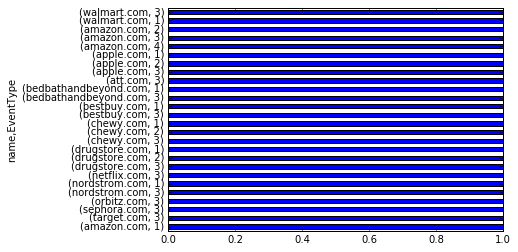

In [70]:
#Avg visits per person per day by name, event type
final = pd.DataFrame({'Avg Times Per Day' : avg.groupby(['name','EventType']).mean().stack()}).reset_index()
final = final[final.level_2 == "mean_per_day"]
final.drop('level_2', axis=1, inplace=True)
final.head(20)

final.sort_values(['name','EventType'])
final.groupby(['name','EventType']).size().order().plot(kind='barh')

In [71]:
#regrouping event type
event_type_dict = {
                    1:"On site search",
                    2:"Product view",
                    3:"Product added to cart",
                    4:"Conversion / purchase",
                    6:"Streaming",
                    7:"Cancellation",
                    8:"View the cart"
                    } 
final['EventType_Cat'] = final['EventType'].map(event_type_dict)
final.head()

#checking to make sure it worked
final.groupby(['EventType','EventType_Cat']).size()

EventType  EventType_Cat        
1          On site search            8
2          Product view              4
3          Product added to cart    13
4          Conversion / purchase     1
dtype: int64

In [72]:
final.head(10)

,name,EventType,Avg Times Per Day,EventType_Cat
1,amazon.com,1,8.516009,On site search
3,amazon.com,2,5.053296,Product view
5,amazon.com,3,1.504186,Product added to cart
7,amazon.com,4,3.445832,Conversion / purchase
9,apple.com,1,2.688506,On site search
11,apple.com,2,1.738095,Product view
13,apple.com,3,1.250000,Product added to cart
15,att.com,3,1.189426,Product added to cart
17,bedbathandbeyond.com,1,4.695849,On site search
19,bedbathandbeyond.com,3,1.545455,Product added to cart


In [73]:
#transpose data column so that EventType is each own column
final = final.pivot(index='name', columns='EventType_Cat', values ='Avg Times Per Day')
final.reset_index()
final.head()

#final.to_csv("D:\\Users\\ndvorak\\Downloads\\Final.csv", sep=",", encoding='utf-8')

EventType_Cat,Conversion / purchase,On site search,Product added to cart,Product view
name,,,,
amazon.com,3.445832,8.516009,1.504186,5.053296
apple.com,NaN,2.688506,1.250000,1.738095
att.com,NaN,NaN,1.189426,NaN
bedbathandbeyond.com,NaN,4.695849,1.545455,NaN
bestbuy.com,NaN,5.689027,2.864492,NaN


In [74]:
#PLOTTING

from bokeh.plotting import *
output_notebook()
from bokeh.models import Circle, HoverTool

BokehJS successfully loaded.

In [75]:
webbrowser.open("http://bokeh.pydata.org/en/0.11.0/docs/user_guide/charts.html")
from bokeh.charts import Bar, output_file, show


In [76]:
#Regular bar chart

#agg can be mean, count...etc

p = Bar(final, label='name', values='Avg Times Per Day', agg='median', title="title")
output_file("bar10.html")
show(p)

KeyError: 'Avg Times Per Day'

In [30]:
#2+ category bar chart
p = Bar(final, label='name', values='Avg Times Per Day', agg='mean', group='EventType_Cat', title="title", legend='top_right')
output_file("bar2.html")
show(p)

In [31]:
#Stacked bar chart

p = Bar(final, label='name', values='Avg Times Per Day', agg='mean', stack='EventType_Cat', title="title", legend='top_right')
output_file("bar3.html")
show(p)

In [33]:
#Now we are getting fancy

from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend

p = Bar(final,
 #If wide data, add more columns here
        values=blend('Avg Times Per Day', name='Times Accessed Per Day Per Person' ),
        label=cat(columns='name', sort=False), 
        agg='mean', 
        stack=cat(columns = 'EventType_Cat', sort=True), 
        title="Event Types by Shopping Site", 
        legend='top_right')


output_file("bar4.html")
show(p)

In [58]:
from bokeh.charts.utils import df_from_json
from bokeh.sampledata.olympics2014 import data
df = df_from_json(data)
df.head()

,abbr,bronze,gold,silver,total,name
0,ALB,0,0,0,0,Albania
1,AND,0,0,0,0,Andorra
2,ARG,0,0,0,0,Argentina
3,ARM,0,0,0,0,Armenia
4,AUS,1,0,2,3,Australia
